# Libraries

In [138]:
pip install sqlalchemy pymysql pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00


In [139]:
#import datetime as dt
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm
from math import sqrt
from sqlalchemy import create_engine

# Credentials

In [3]:
#delete before sending:
username = 'margera_panagiotou_george'
password = 'Qe7v01EA0q'

# Obtaining the data

We will use the weather data from the past 24 hours to forecast the next 7 days.
To train the AI models our training dataset will be the past 15 days starting from 19/9/2024 00:00.

In [19]:
# Calculate the timestamps for the past 2 hours
end_time = datetime(2024, 9, 21, 0, 0)
start_time = end_time - timedelta(hours=24)

# Format the timestamps in the required format (ISO 8601)
end_time_str = end_time.strftime('%Y-%m-%dT%H:%M:%SZ')
start_time_str = start_time.strftime('%Y-%m-%dT%H:%M:%SZ')

We wil only use the 15 basic parameters offered by meteomatics.api

parameter  	Description \\
wind_speed_10m:ms	        Instantaneous wind speed \\
wind_dir_10m:d	          Instantaneous wind direction \\
wind_gusts_10m_24h:ms	      Wind gusts in the previous 24h \\
t_2m:C	                  Instantaneous temperature (C) \\
t_max_2m_24h:C	          Maximum temperature \\
t_min_2m_24h:C	Minimum temperature \\
msl_pressure:hPa	Mean sea level pressure \\
precip_1h:mm	Precipitation accumulated over the past hour \\
precip_24h:mm	Precipitation accumulated over the past 24 hours \\
weather_symbol_1h:idx	Weather symbol giving an overall impression of the weather state of the past hour. \\
weather_symbol_24h:idx	Weather symbol giving an overall impression of the weather state of the past 24 hours. \\
uv:idx	UV index \\
sunrise:sql	Sunrise \\
sunset:sql	Sunset \\

In [20]:
parameters = 'wind_speed_10m:ms,wind_dir_10m:d,wind_gusts_10m_24h:ms,t_2m:C,t_max_2m_24h:C,t_min_2m_24h:C,precip_1h:mm'

**1.Athens**

In [21]:
# Latitude and Longitude of Athens
coordinates_1 = [(37.983810,23.727539)]
latitude1 = 37.9838  # Latitude of Athens
longitude1 = 23.7275  # Longitude of Athens

**2.Thessaloniki**

In [22]:
# Latitude and Longitude of Thessaloniki
coordinates_2 = [(40.629269,22.947412)]
latitude2 = 40.629269 # Latitude of Thessaloniki
longitude2 = 22.947412  # Longitude of Thessaloniki

**3.Patras**

In [23]:
# Latitude and Longitude of Patras
coordinates_3 = [(38.246639,21.734573)]
latitude3 = 38.246639 # Latitude of Patras
longitude3 = 21.734573  # Longitude of Patras

## Gettign the data from the API

Requesting 3 queries (Athens, Thessaloniki and patras) for the same hours with the same parameters \\
Note that all 3 cities have the same UTC

### **1.Athens**

In [24]:
 # Create the API URL
url = f'https://api.meteomatics.com/{start_time_str}--{end_time_str}:PT1H/{parameters}/{latitude1},{longitude1}/json'

In [25]:
# Make the API request
response = requests.get(url, auth=(username, password))

In [26]:
 # Check if the response is valid
if response.status_code == 200:
    # Parse the JSON response
    data1 = response.json()
else:
    print(f"Error: Unable to fetch data for Athens, status code: {response.status_code}")

### **2.Thessaloniki**

In [27]:
 # Create the API URL
url = f'https://api.meteomatics.com/{start_time_str}--{end_time_str}:PT1H/{parameters}/{latitude2},{longitude2}/json'

In [28]:
# Make the API request
response = requests.get(url, auth=(username, password))

In [29]:
 # Check if the response is valid
if response.status_code == 200:
    # Parse the JSON response
    data2 = response.json()
else:
    print(f"Error: Unable to fetch data for Thessaloniki, status code: {response.status_code}")

### **3.Patras**

In [30]:
 # Create the API URL
url = f'https://api.meteomatics.com/{start_time_str}--{end_time_str}:PT1H/{parameters}/{latitude3},{longitude3}/json'

In [31]:
# Make the API request
response = requests.get(url, auth=(username, password))

In [32]:
 # Check if the response is valid
if response.status_code == 200:
    # Parse the JSON response
    data3 = response.json()
else:
    print(f"Error: Unable to fetch data for Thessaloniki, status code: {response.status_code}")

## Creating the dataframes

Creating 3 dataframes using Pandas \\
df1 is Athens \\
df2 is thessaloniki  \\
df3 is patras \\

### 1.Athens

In [33]:
 # Loop through the timestamps and display the data for each hour
for i in range(len(data1['data'][0]['coordinates'][0]['dates'])):
    timestamp   = data1['data'][0]['coordinates'][0]['dates'][i]['date']
    wind_speed  = data1['data'][0]['coordinates'][0]['dates'][i]['value']
    wind_dir    = data1['data'][1]['coordinates'][0]['dates'][i]['value']
    wind_gusts  = data1['data'][2]['coordinates'][0]['dates'][i]['value']
    temperature = data1['data'][3]['coordinates'][0]['dates'][i]['value']
    max_temp    = data1['data'][4]['coordinates'][0]['dates'][i]['value']
    min_temp    = data1['data'][5]['coordinates'][0]['dates'][i]['value']
    percipitation    = data1['data'][6]['coordinates'][0]['dates'][i]['value']

    print(f"Timestamp: {timestamp}")
    print(f"Temperature: {temperature}°C")
    print(f"Wind direction: {wind_dir}°")
    print(f"Wind Speed: {wind_speed} m/s")
    print(f"Wind gusts: {wind_gusts}m/s")
    print(f"Max temp: {max_temp} °C")
    print(f"Min temp: {min_temp} °C")
    print(f"Percipitation: {percipitation} mm")
    print("-" * 40)

Timestamp: 2024-09-20T00:00:00Z
Temperature: 18.7°C
Wind direction: 4.3°
Wind Speed: 2.0 m/s
Wind gusts: 3.9m/s
Max temp: 28.0 °C
Min temp: 18.3 °C
Percipitation: 0.0 mm
----------------------------------------
Timestamp: 2024-09-20T01:00:00Z
Temperature: 19.2°C
Wind direction: 6.5°
Wind Speed: 2.0 m/s
Wind gusts: 3.9m/s
Max temp: 28.0 °C
Min temp: 18.3 °C
Percipitation: 0.0 mm
----------------------------------------
Timestamp: 2024-09-20T02:00:00Z
Temperature: 19.0°C
Wind direction: 11.8°
Wind Speed: 2.1 m/s
Wind gusts: 3.9m/s
Max temp: 28.0 °C
Min temp: 18.3 °C
Percipitation: 0.0 mm
----------------------------------------
Timestamp: 2024-09-20T03:00:00Z
Temperature: 18.8°C
Wind direction: 359.7°
Wind Speed: 2.0 m/s
Wind gusts: 3.9m/s
Max temp: 28.0 °C
Min temp: 18.3 °C
Percipitation: 0.0 mm
----------------------------------------
Timestamp: 2024-09-20T04:00:00Z
Temperature: 18.9°C
Wind direction: 0.2°
Wind Speed: 2.2 m/s
Wind gusts: 3.9m/s
Max temp: 28.0 °C
Min temp: 18.3 °C
Perci

In [34]:
#Create the database
 # Prepare lists to store data for each weather parameter
timestamps = []
temperatures = []
precipitations = []
wind_speeds = []
Wind_directions = []
Wind_gusts = []
Max_temps = []
Min_temps = []

# Loop through the timestamps and store the data for each hour
for i in range(len(data1['data'][0]['coordinates'][0]['dates'])):
  timestamp   = data1['data'][0]['coordinates'][0]['dates'][i]['date']
  wind_speed  = data1['data'][0]['coordinates'][0]['dates'][i]['value']
  wind_dir    = data1['data'][1]['coordinates'][0]['dates'][i]['value']
  wind_gusts  = data1['data'][2]['coordinates'][0]['dates'][i]['value']
  temperature = data1['data'][3]['coordinates'][0]['dates'][i]['value']
  max_temp    = data1['data'][4]['coordinates'][0]['dates'][i]['value']
  min_temp    = data1['data'][5]['coordinates'][0]['dates'][i]['value']
  percipitation    = data1['data'][6]['coordinates'][0]['dates'][i]['value']

  # Append the data to the respective lists
  timestamps.append(timestamp)
  temperatures.append(temperature)
  precipitations.append(percipitation)
  wind_speeds.append(wind_speed)
  Wind_directions.append(wind_dir)
  Wind_gusts.append(wind_gusts)
  Max_temps.append(max_temp)
  Min_temps.append(min_temp)

  # Create a pandas DataFrame from the collected data
df1 = pd.DataFrame({
            'Timestamp': timestamps,
            'Temperature (°C)': temperatures,
            'Precipitation (mm)': precipitations,
            'Wind Speed (m/s)': wind_speeds,
            'Wind Direction (°)': Wind_directions,
            'Wind Gusts (m/s)': Wind_gusts,
            'Max Temp (°C)': Max_temps,
            'Min Temp (°C)': Min_temps
        })

# Set the Timestamp column as the DataFrame index
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1.set_index('Timestamp', inplace=True)
df1.head()

# Return the DataFrame

,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Wind Direction (°),Wind Gusts (m/s),Max Temp (°C),Min Temp (°C)
Timestamp,,,,,,,
2024-09-20 00:00:00+00:00,18.7,0.0,2.0,4.3,3.9,28.0,18.3
2024-09-20 01:00:00+00:00,19.2,0.0,2.0,6.5,3.9,28.0,18.3
2024-09-20 02:00:00+00:00,19.0,0.0,2.1,11.8,3.9,28.0,18.3
2024-09-20 03:00:00+00:00,18.8,0.0,2.0,359.7,3.9,28.0,18.3
2024-09-20 04:00:00+00:00,18.9,0.0,2.2,0.2,3.9,28.0,18.3


### 2.Thessaloniki

In [35]:
#Create the database
 # Prepare lists to store data for each weather parameter
timestamps = []
temperatures = []
precipitations = []
wind_speeds = []
Wind_directions = []
Wind_gusts = []
Max_temps = []
Min_temps = []

# Loop through the timestamps and store the data for each hour
for i in range(len(data1['data'][0]['coordinates'][0]['dates'])):
  timestamp   = data2['data'][0]['coordinates'][0]['dates'][i]['date']
  wind_speed  = data2['data'][0]['coordinates'][0]['dates'][i]['value']
  wind_dir    = data2['data'][1]['coordinates'][0]['dates'][i]['value']
  wind_gusts  = data2['data'][2]['coordinates'][0]['dates'][i]['value']
  temperature = data2['data'][3]['coordinates'][0]['dates'][i]['value']
  max_temp    = data2['data'][4]['coordinates'][0]['dates'][i]['value']
  min_temp    = data2['data'][5]['coordinates'][0]['dates'][i]['value']
  percipitation    = data2['data'][6]['coordinates'][0]['dates'][i]['value']

  # Append the data to the respective lists
  timestamps.append(timestamp)
  temperatures.append(temperature)
  precipitations.append(percipitation)
  wind_speeds.append(wind_speed)
  Wind_directions.append(wind_dir)
  Wind_gusts.append(wind_gusts)
  Max_temps.append(max_temp)
  Min_temps.append(min_temp)

  # Create a pandas DataFrame from the collected data
df2 = pd.DataFrame({
            'Timestamp': timestamps,
            'Temperature (°C)': temperatures,
            'Precipitation (mm)': precipitations,
            'Wind Speed (m/s)': wind_speeds,
            'Wind Direction (°)': Wind_directions,
            'Wind Gusts (m/s)': Wind_gusts,
            'Max Temp (°C)': Max_temps,
            'Min Temp (°C)': Min_temps
        })

# Set the Timestamp column as the DataFrame index
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
df2.set_index('Timestamp', inplace=True)
df2.head()

,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Wind Direction (°),Wind Gusts (m/s),Max Temp (°C),Min Temp (°C)
Timestamp,,,,,,,
2024-09-20 00:00:00+00:00,17.4,0.0,1.4,31.6,3.6,24.5,16.0
2024-09-20 01:00:00+00:00,18.0,0.0,1.7,17.5,3.6,24.5,16.0
2024-09-20 02:00:00+00:00,17.8,0.0,1.4,359.9,3.6,24.5,16.0
2024-09-20 03:00:00+00:00,17.6,0.0,1.4,9.7,3.6,24.5,16.0
2024-09-20 04:00:00+00:00,17.6,0.0,1.2,32.4,3.6,24.4,16.4


### 3.Thessaloniki

In [36]:
#Create the database
 # Prepare lists to store data for each weather parameter
timestamps = []
temperatures = []
precipitations = []
wind_speeds = []
Wind_directions = []
Wind_gusts = []
Max_temps = []
Min_temps = []

# Loop through the timestamps and store the data for each hour
for i in range(len(data3['data'][0]['coordinates'][0]['dates'])):
  timestamp   = data3['data'][0]['coordinates'][0]['dates'][i]['date']
  wind_speed  = data3['data'][0]['coordinates'][0]['dates'][i]['value']
  wind_dir    = data3['data'][1]['coordinates'][0]['dates'][i]['value']
  wind_gusts  = data3['data'][2]['coordinates'][0]['dates'][i]['value']
  temperature = data3['data'][3]['coordinates'][0]['dates'][i]['value']
  max_temp    = data3['data'][4]['coordinates'][0]['dates'][i]['value']
  min_temp    = data3['data'][5]['coordinates'][0]['dates'][i]['value']
  percipitation    = data3['data'][6]['coordinates'][0]['dates'][i]['value']

  # Append the data to the respective lists
  timestamps.append(timestamp)
  temperatures.append(temperature)
  precipitations.append(percipitation)
  wind_speeds.append(wind_speed)
  Wind_directions.append(wind_dir)
  Wind_gusts.append(wind_gusts)
  Max_temps.append(max_temp)
  Min_temps.append(min_temp)

  # Create a pandas DataFrame from the collected data
df3 = pd.DataFrame({
            'Timestamp': timestamps,
            'Temperature (°C)': temperatures,
            'Precipitation (mm)': precipitations,
            'Wind Speed (m/s)': wind_speeds,
            'Wind Direction (°)': Wind_directions,
            'Wind Gusts (m/s)': Wind_gusts,
            'Max Temp (°C)': Max_temps,
            'Min Temp (°C)': Min_temps
        })

# Set the Timestamp column as the DataFrame index
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])
df3.set_index('Timestamp', inplace=True)
df3.head()

,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Wind Direction (°),Wind Gusts (m/s),Max Temp (°C),Min Temp (°C)
Timestamp,,,,,,,
2024-09-20 00:00:00+00:00,19.6,0.0,1.8,76.0,5.4,26.2,19.3
2024-09-20 01:00:00+00:00,19.8,0.0,1.9,80.2,5.4,26.2,19.3
2024-09-20 02:00:00+00:00,19.5,0.0,1.9,81.7,5.4,26.2,19.2
2024-09-20 03:00:00+00:00,19.9,0.0,1.9,82.7,5.4,26.2,19.2
2024-09-20 04:00:00+00:00,19.9,0.0,2.2,78.6,5.4,26.2,19.2


#View of the Databases

df1 is for Athens

In [37]:
df1.head()

,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Wind Direction (°),Wind Gusts (m/s),Max Temp (°C),Min Temp (°C)
Timestamp,,,,,,,
2024-09-20 00:00:00+00:00,18.7,0.0,2.0,4.3,3.9,28.0,18.3
2024-09-20 01:00:00+00:00,19.2,0.0,2.0,6.5,3.9,28.0,18.3
2024-09-20 02:00:00+00:00,19.0,0.0,2.1,11.8,3.9,28.0,18.3
2024-09-20 03:00:00+00:00,18.8,0.0,2.0,359.7,3.9,28.0,18.3
2024-09-20 04:00:00+00:00,18.9,0.0,2.2,0.2,3.9,28.0,18.3


df2 is for Thessaloniki

In [38]:
df2.head()

,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Wind Direction (°),Wind Gusts (m/s),Max Temp (°C),Min Temp (°C)
Timestamp,,,,,,,
2024-09-20 00:00:00+00:00,17.4,0.0,1.4,31.6,3.6,24.5,16.0
2024-09-20 01:00:00+00:00,18.0,0.0,1.7,17.5,3.6,24.5,16.0
2024-09-20 02:00:00+00:00,17.8,0.0,1.4,359.9,3.6,24.5,16.0
2024-09-20 03:00:00+00:00,17.6,0.0,1.4,9.7,3.6,24.5,16.0
2024-09-20 04:00:00+00:00,17.6,0.0,1.2,32.4,3.6,24.4,16.4


df3 is for Patras

In [39]:
df3.head()

,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Wind Direction (°),Wind Gusts (m/s),Max Temp (°C),Min Temp (°C)
Timestamp,,,,,,,
2024-09-20 00:00:00+00:00,19.6,0.0,1.8,76.0,5.4,26.2,19.3
2024-09-20 01:00:00+00:00,19.8,0.0,1.9,80.2,5.4,26.2,19.3
2024-09-20 02:00:00+00:00,19.5,0.0,1.9,81.7,5.4,26.2,19.2
2024-09-20 03:00:00+00:00,19.9,0.0,1.9,82.7,5.4,26.2,19.2
2024-09-20 04:00:00+00:00,19.9,0.0,2.2,78.6,5.4,26.2,19.2


# EDA

Data preprocessing notes \\

*   There is no missing Data (see below)
*   All columns have numerical data
*   No need for data normalization

-> Data is in great condition so we can start analysing


In [40]:
columns = ['Temperature (°C)', 'Precipitation (mm)', 'Wind Speed (m/s)',
       'Wind Direction (°)', 'Wind Gusts (m/s)', 'Max Temp (°C)',
       'Min Temp (°C)']

###Cheking for missing data

In [41]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('Missing Data for Athens')
missing_data.head(5)

Missing Data for Athens


,Total,Percent
Temperature (°C),0,0.0
Precipitation (mm),0,0.0
Wind Speed (m/s),0,0.0
Wind Direction (°),0,0.0
Wind Gusts (m/s),0,0.0


In [42]:
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('Missing Data for Thessaloniki')
missing_data.head(5)

Missing Data for Thessaloniki


,Total,Percent
Temperature (°C),0,0.0
Precipitation (mm),0,0.0
Wind Speed (m/s),0,0.0
Wind Direction (°),0,0.0
Wind Gusts (m/s),0,0.0


In [43]:
total = df3.isnull().sum().sort_values(ascending=False)
percent = (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('Missing Data for Patras')
missing_data.head(5)

Missing Data for Patras


,Total,Percent
Temperature (°C),0,0.0
Precipitation (mm),0,0.0
Wind Speed (m/s),0,0.0
Wind Direction (°),0,0.0
Wind Gusts (m/s),0,0.0


## 1.Athens

In [44]:
# Summary statistics
print(df1.describe())

       Temperature (°C)  Precipitation (mm)  Wind Speed (m/s)  \
count         25.000000           25.000000         25.000000   
mean          22.312000            0.013600          1.664000   
std            2.947784            0.048466          0.465367   
min           18.600000            0.000000          0.600000   
25%           19.200000            0.000000          1.300000   
50%           22.400000            0.000000          1.800000   
75%           25.400000            0.000000          2.000000   
max           26.300000            0.210000          2.500000   

       Wind Direction (°)  Wind Gusts (m/s)  Max Temp (°C)  Min Temp (°C)  
count           25.000000         25.000000      25.000000         25.000  
mean           193.308000          3.836000      27.364000         18.296  
std            169.511106          0.095219       0.653758          0.020  
min              0.200000          3.700000      26.700000         18.200  
25%              6.500000         

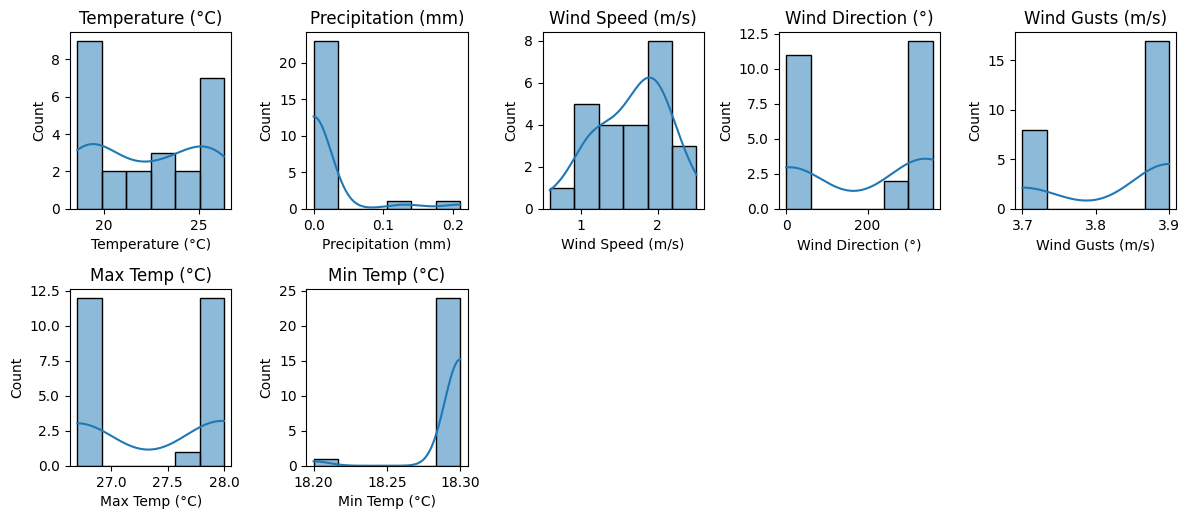

In [45]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(df1[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

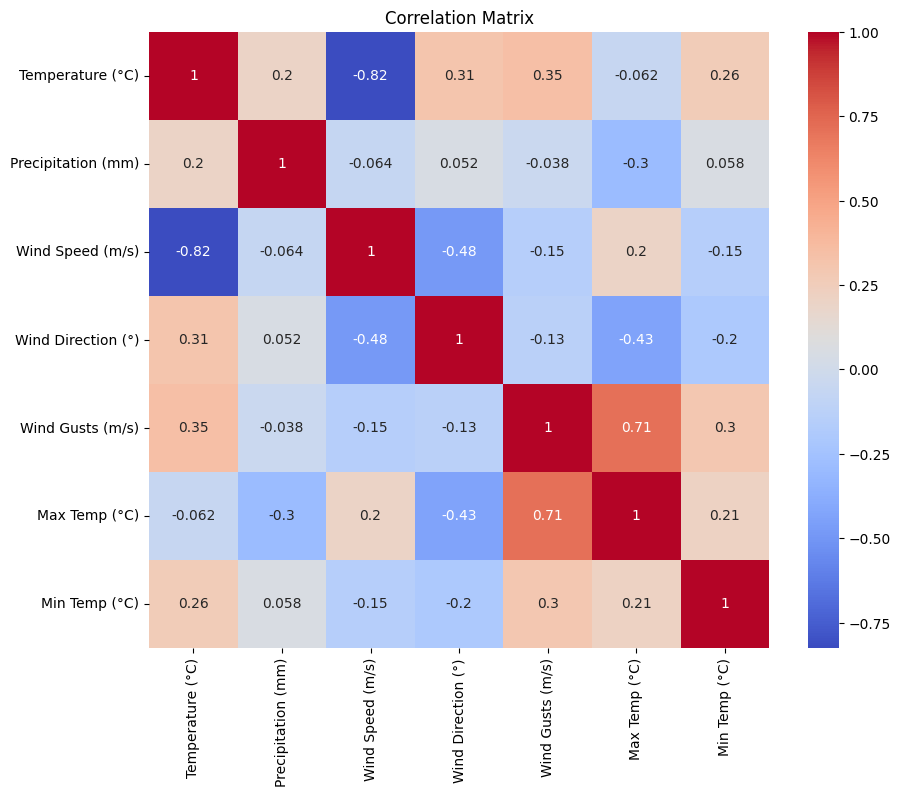

In [46]:
data = df1[columns]
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Plot the daily temperature change
#plt.figure(figsize=(16,10), dpi=100)
#plt.plot(df1.index, df1[0], color='tab:red')
#plt.gca().set(title="Hourly Temperature in Athens", xlabel='Date', ylabel="Degree (in Celsius)")
#plt.show()

# ML Models

We will use a base

## Athens

### ARIMA

In [48]:
# Assuming df contains the temperature data, isolate the 'Temperature (C)' column
temperature_series = df1['Temperature (°C)']

In [49]:
# Split the temperature data into train (all but last 4 hours) and test (last 4 hours)
train_data = temperature_series[:-4]
test_data = temperature_series[-4:]

In [50]:
# Perform grid search with auto_arima to find the best p, d, q parameters
model = pm.auto_arima(
    train_data,             # Training data
    start_p=1,              # Starting values for p (AR term)
    start_q=1,              # Starting values for q (MA term)
    max_p=5,                # Maximum value for p (AR term)
    max_q=5,                # Maximum value for q (MA term)
    seasonal=False,         # We're not considering seasonality in this case
    d=None,                 # Automatically determine differencing (d) value
    trace=True,             # Print results as we search
    error_action='ignore',  # Ignore errors
    suppress_warnings=True, # Suppress warnings
    stepwise=True           # Use a stepwise approach for faster grid search
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=59.531, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=193.387, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=56.828, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=58.808, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=57.953, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=56.070, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=57.921, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=59.560, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=52.720, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=74.998, Time=0.07 sec
 ARIMA(1,0,

In [51]:
# Summarize the best model found
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 -18.740
Date:                Sat, 21 Sep 2024   AIC                             47.479
Time:                        04:12:02   BIC                             52.702
Sample:                    09-20-2024   HQIC                            48.613
                         - 09-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6539      0.570      2.902      0.004       0.537       2.771
ar.L1          1.9106      0.042     45.801      0.000       1.829       1.992
ar.L2         -0.9837      0.033    -29.624      0.0

In [52]:
# Make predictions for the test set (last 4 hours)
n_periods = 4  # Number of periods to predict
forecast = model.predict(n_periods=n_periods)

In [53]:
# Evaluate the forecast using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.397041074800172


In [54]:
# Display forecast vs actual
print("\nPredicted Temperatures:", forecast)
print("Actual Temperatures:", test_data.values)


Predicted Temperatures: 2024-09-20 21:00:00+00:00    20.318590
2024-09-20 22:00:00+00:00    19.718884
2024-09-20 23:00:00+00:00    19.341746
2024-09-21 00:00:00+00:00    19.211108
Freq: H, dtype: float64
Actual Temperatures: [20.2 19.5 18.9 18.6]


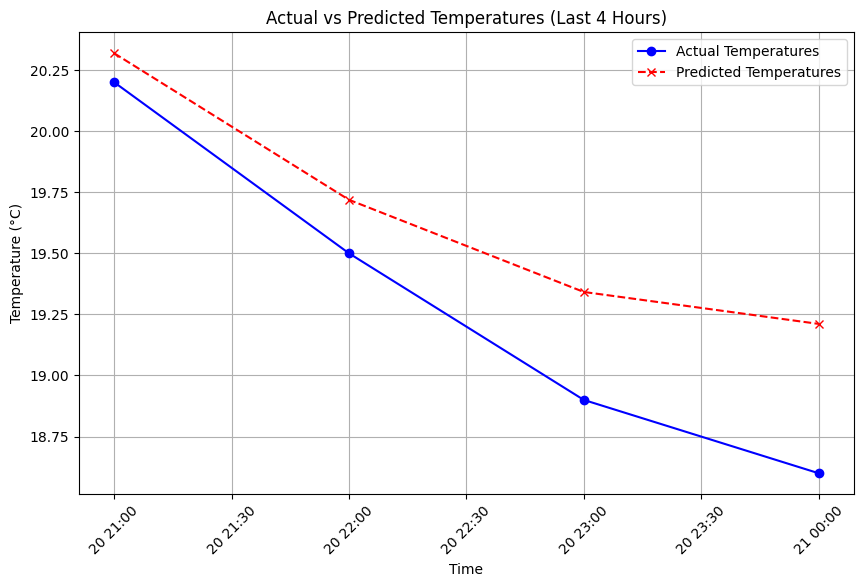

In [55]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Temperatures', color='blue', marker='o')
plt.plot(test_data.index, forecast, label='Predicted Temperatures', color='red', linestyle='--', marker='x')

plt.title('Actual vs Predicted Temperatures (Last 4 Hours)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

### ARIMAX

In [58]:
# Set temperature as the target variable
target = 'Temperature (°C)'

In [59]:
# Assuming df contains the temperature data, isolate the 'Temperature (C)' column
temperature_series = df1['Temperature (°C)']

In [60]:
# Exogenous variables (all columns except temperature and time)
exogenous_vars = df1.columns.difference(['Time', target])

In [61]:
# Split the data into training and testing sets
# Train data: All but the last 4 hours
train_data = df1[:-4]
test_data = df1[-4:]

In [62]:
# Split the target (temperature) and exogenous variables
train_target = train_data[target]
test_target = test_data[target]
train_exogenous = train_data[exogenous_vars]
test_exogenous = test_data[exogenous_vars]

In [63]:
# Perform grid search with auto_arima and include external regressors
model = pm.auto_arima(
    y=train_target,             # Training target (temperature)
    X=train_exogenous,          # Exogenous variables (other weather data)
    start_p=1,                  # Starting values for p (AR term)
    start_q=1,                  # Starting values for q (MA term)
    max_p=5,                    # Maximum value for p (AR term)
    max_q=5,                    # Maximum value for q (MA term)
    seasonal=False,             # No seasonality in this case
    d=None,                     # Let the model determine differencing (d)
    trace=True,                 # Print the search progress
    error_action='ignore',      # Ignore errors
    suppress_warnings=True,     # Suppress warnings
    stepwise=True               # Use stepwise grid search
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=65.678, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.839, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=67.381, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=83.084, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=80.079, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=78.406, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=63.637, Time=0.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=67.388, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=67.777, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 2.800 seconds


In [64]:
# Summarize the model
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -22.819
Date:                Sat, 21 Sep 2024   AIC                             63.637
Time:                        04:14:01   BIC                             73.038
Sample:                    09-20-2024   HQIC                            65.677
                         - 09-20-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Temp (°C)         -1.3554      1.292     -1.049      0.294      -3.887       1.176
Min Temp (°C)          1.8219      2.160      0.844      0.399      -2.411       6.055
Precipitation (mm)  

In [65]:
# Make predictions for the test set (last 4 hours)
n_periods = 4  # Number of periods to predict
forecast = model.predict(n_periods=n_periods, X=test_exogenous)

In [66]:
# Evaluate the forecast using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_target, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.4837138796961231


In [67]:
# Display forecast vs actual
print("\nPredicted Temperatures:", forecast)
print("Actual Temperatures:", test_target.values)


Predicted Temperatures: 2024-09-20 21:00:00+00:00    20.621586
2024-09-20 22:00:00+00:00    20.958380
2024-09-20 23:00:00+00:00    20.627385
2024-09-21 00:00:00+00:00    20.475410
Freq: H, dtype: float64
Actual Temperatures: [20.2 19.5 18.9 18.6]


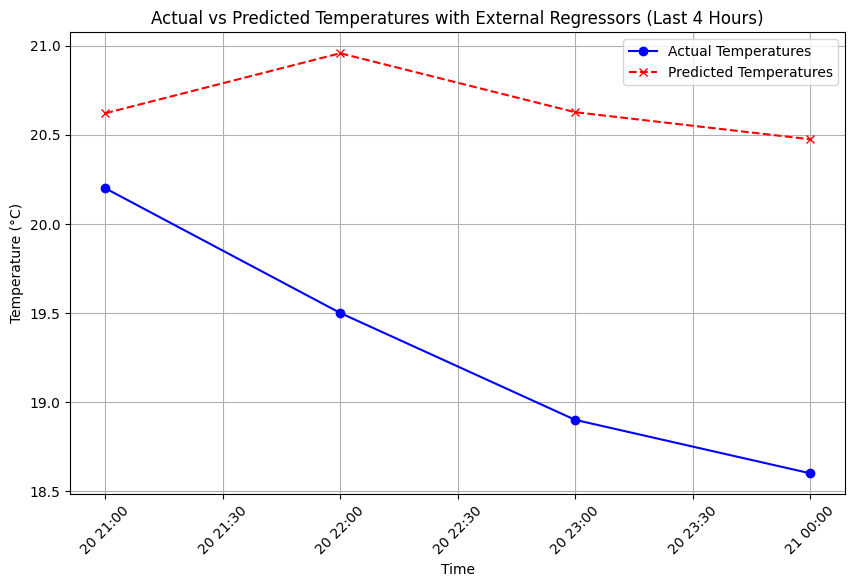

In [68]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual Temperatures', color='blue', marker='o')
plt.plot(test_target.index, forecast, label='Predicted Temperatures', color='red', linestyle='--', marker='x')

plt.title('Actual vs Predicted Temperatures with External Regressors (Last 4 Hours)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

## Thessaloniki

### ARIMAX

In [69]:
# Assuming df contains the temperature data, isolate the 'Temperature (C)' column
temperature_series = df2['Temperature (°C)']

In [70]:
# Exogenous variables (all columns except temperature and time)
exogenous_vars = df2.columns.difference(['Time', target])

In [71]:
# Split the data into training and testing sets
# Train data: All but the last 4 hours
train_data = df2[:-4]
test_data = df2[-4:]

In [72]:
# Split the target (temperature) and exogenous variables
train_target = train_data[target]
test_target = test_data[target]
train_exogenous = train_data[exogenous_vars]
test_exogenous = test_data[exogenous_vars]

In [73]:
# Perform grid search with auto_arima and include external regressors
model2 = pm.auto_arima(
    y=train_target,             # Training target (temperature)
    X=train_exogenous,          # Exogenous variables (other weather data)
    start_p=1,                  # Starting values for p (AR term)
    start_q=1,                  # Starting values for q (MA term)
    max_p=5,                    # Maximum value for p (AR term)
    max_q=5,                    # Maximum value for q (MA term)
    seasonal=False,             # No seasonality in this case
    d=None,                     # Let the model determine differencing (d)
    trace=True,                 # Print the search progress
    error_action='ignore',      # Ignore errors
    suppress_warnings=True,     # Suppress warnings
    stepwise=True               # Use stepwise grid search
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=64.232, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.498, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=71.346, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=76.856, Time=1.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=70.386, Time=1.68 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=66.999, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=70.032, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=65.424, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=66.607, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.258, Time=0.36 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 6.133 seconds


In [74]:
# Summarize the model
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -23.116
Date:                Sat, 21 Sep 2024   AIC                             64.232
Time:                        04:14:13   BIC                             73.633
Sample:                    09-20-2024   HQIC                            66.272
                         - 09-20-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Temp (°C)          1.3268      0.897      1.479      0.139      -0.431       3.085
Min Temp (°C)          0.7948      1.001      0.794      0.427      -1.166       2.756
Precipitation (mm)  

In [75]:
# Make predictions for the test set (last 4 hours)
n_periods = 4  # Number of periods to predict
forecast = model2.predict(n_periods=n_periods, X=test_exogenous)

In [76]:
# Evaluate the forecast using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_target, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.6989530741893093


In [77]:
# Display forecast vs actual
print("\nPredicted Temperatures:", forecast)
print("Actual Temperatures:", test_target.values)


Predicted Temperatures: 2024-09-20 21:00:00+00:00    15.028563
2024-09-20 22:00:00+00:00    13.949478
2024-09-20 23:00:00+00:00    14.489456
2024-09-21 00:00:00+00:00    14.514953
Freq: H, dtype: float64
Actual Temperatures: [18.7 18.5 17.9 17.5]


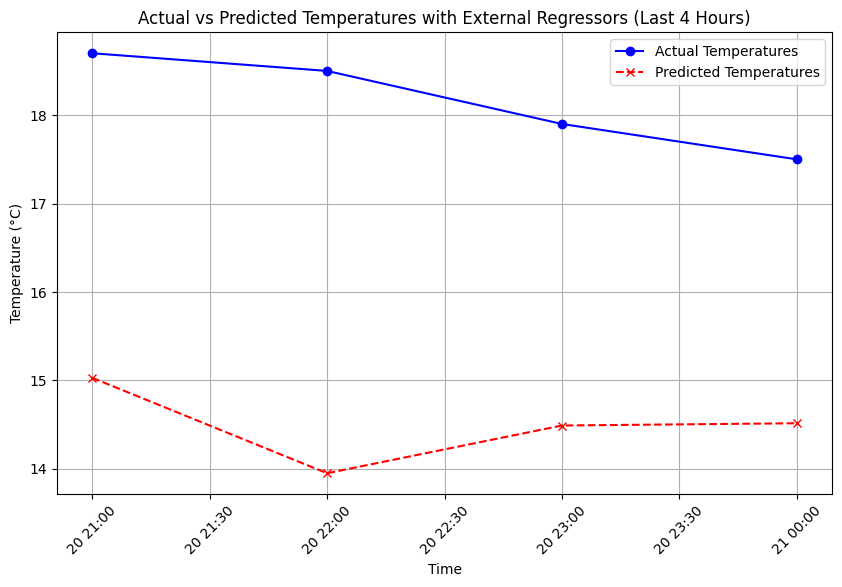

In [78]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual Temperatures', color='blue', marker='o')
plt.plot(test_target.index, forecast, label='Predicted Temperatures', color='red', linestyle='--', marker='x')

plt.title('Actual vs Predicted Temperatures with External Regressors (Last 4 Hours)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

## Patras

### ARIMAX

In [79]:
# Assuming df contains the temperature data, isolate the 'Temperature (C)' column
temperature_series = df2['Temperature (°C)']

In [80]:
# Exogenous variables (all columns except temperature and time)
exogenous_vars = df2.columns.difference(['Time', target])

In [81]:
# Split the data into training and testing sets
# Train data: All but the last 4 hours
train_data = df2[:-4]
test_data = df2[-4:]

In [82]:
# Split the target (temperature) and exogenous variables
train_target = train_data[target]
test_target = test_data[target]
train_exogenous = train_data[exogenous_vars]
test_exogenous = test_data[exogenous_vars]

In [83]:
# Perform grid search with auto_arima and include external regressors
model3 = pm.auto_arima(
    y=train_target,             # Training target (temperature)
    X=train_exogenous,          # Exogenous variables (other weather data)
    start_p=1,                  # Starting values for p (AR term)
    start_q=1,                  # Starting values for q (MA term)
    max_p=5,                    # Maximum value for p (AR term)
    max_q=5,                    # Maximum value for q (MA term)
    seasonal=False,             # No seasonality in this case
    d=None,                     # Let the model determine differencing (d)
    trace=True,                 # Print the search progress
    error_action='ignore',      # Ignore errors
    suppress_warnings=True,     # Suppress warnings
    stepwise=True               # Use stepwise grid search
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=64.232, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.498, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=71.346, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=76.856, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=70.386, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=66.999, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=70.032, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=65.424, Time=0.40 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=66.607, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.258, Time=0.33 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.076 seconds


In [84]:
# Summarize the model
print(model3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -23.116
Date:                Sat, 21 Sep 2024   AIC                             64.232
Time:                        04:14:21   BIC                             73.633
Sample:                    09-20-2024   HQIC                            66.272
                         - 09-20-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Temp (°C)          1.3268      0.897      1.479      0.139      -0.431       3.085
Min Temp (°C)          0.7948      1.001      0.794      0.427      -1.166       2.756
Precipitation (mm)  

In [85]:
# Make predictions for the test set (last 4 hours)
n_periods = 4  # Number of periods to predict
forecast = model3.predict(n_periods=n_periods, X=test_exogenous)

In [86]:
# Evaluate the forecast using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_target, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.6989530741893093


In [87]:
# Display forecast vs actual
print("\nPredicted Temperatures:", forecast)
print("Actual Temperatures:", test_target.values)


Predicted Temperatures: 2024-09-20 21:00:00+00:00    15.028563
2024-09-20 22:00:00+00:00    13.949478
2024-09-20 23:00:00+00:00    14.489456
2024-09-21 00:00:00+00:00    14.514953
Freq: H, dtype: float64
Actual Temperatures: [18.7 18.5 17.9 17.5]


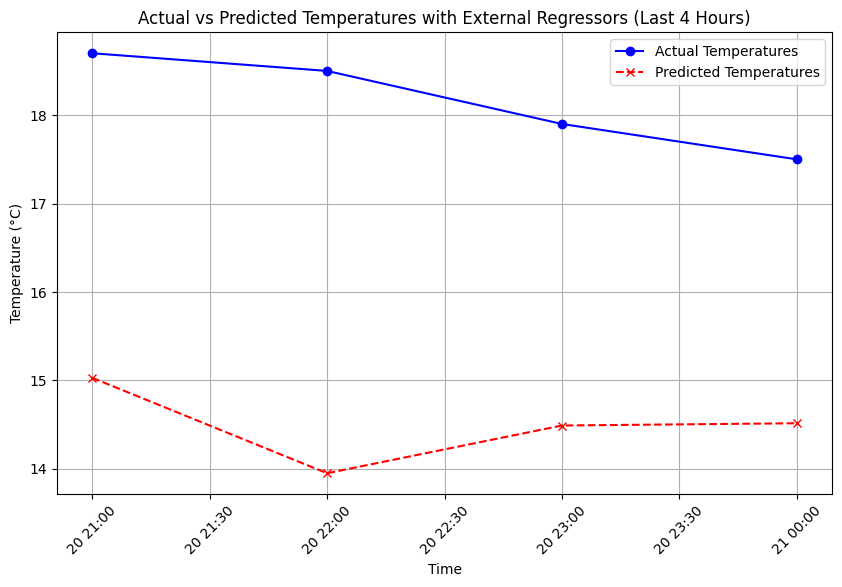

In [88]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual Temperatures', color='blue', marker='o')
plt.plot(test_target.index, forecast, label='Predicted Temperatures', color='red', linestyle='--', marker='x')

plt.title('Actual vs Predicted Temperatures with External Regressors (Last 4 Hours)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# Predictions

The ARIMAX model requires the external regressors (weather data) for the period we want to predict. \\
We will run an ARIMA model for every exogenous variable \\

Advantages of This Approach: \\
More accurate exogenous variables: Forecasting the exogenous variables rather than assuming constant values improves the accuracy of temperature predictions.
Dynamic prediction: Each exogenous variable follows its own ARIMA process, making the overall forecast more robust. \\
Things to Note: \\
Forecast Accuracy: The accuracy of the temperature forecast heavily depends on the accuracy of the ARIMA models for the exogenous variables. \\
Model Complexity: While this method improves predictions, it also increases model complexity as each exogenous variable is modeled separately. \\


## Athens

### exogenous predictions with ARIMA

In [99]:
# Training ARIMA models for each exogenous variable and predict future values (next 10 hours)
predicted_exogenous1 = pd.DataFrame()

In [100]:
for var in exogenous_vars:
    # Fit an ARIMA model for the current exogenous variable
    model_exog = pm.auto_arima(train_data[var], seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

    # Forecast the next 10 hours for the current exogenous variable
    forecast_exog = model_exog.predict(n_periods=10)

    # Store the forecasted exogenous variable
    predicted_exogenous1[var] = forecast_exog

### Forecasting

In [101]:
# Now that we have forecasted exogenous variables, we can use them in ARIMAX to predict the temperature
# Perform grid search with auto_arima for the temperature model, including forecasted exogenous variables
model_arimax1 = pm.auto_arima(
    y=train_target,             # Training target (temperature)
    X=train_exogenous,          # Exogenous variables (other weather data)
    start_p=1,                  # Starting values for p (AR term)
    start_q=1,                  # Starting values for q (MA term)
    max_p=5,                    # Maximum value for p (AR term)
    max_q=5,                    # Maximum value for q (MA term)
    seasonal=False,             # No seasonality in this case
    d=None,                     # Let the model determine differencing (d)
    trace=True,                 # Print the search progress
    error_action='ignore',      # Ignore errors
    suppress_warnings=True,     # Suppress warnings
    stepwise=True               # Use stepwise grid search
)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=64.232, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.498, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=71.346, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=76.856, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=70.386, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=66.999, Time=0.41 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=70.032, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=65.424, Time=0.43 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=66.607, Time=1.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.258, Time=1.98 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 6.239 seconds


In [102]:
# Summarize the ARIMAX model
print(model_arimax1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -23.116
Date:                Sat, 21 Sep 2024   AIC                             64.232
Time:                        04:17:18   BIC                             73.633
Sample:                    09-20-2024   HQIC                            66.272
                         - 09-20-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Temp (°C)          1.3268      0.897      1.479      0.139      -0.431       3.085
Min Temp (°C)          0.7948      1.001      0.794      0.427      -1.166       2.756
Precipitation (mm)  

In [103]:
# Predict the temperature for the next 10 hours using the forecasted exogenous variables
n_periods = 10  # Number of hours to predict
future_forecast1 = model_arimax1.predict(n_periods=n_periods, X=predicted_exogenous1)

In [104]:
# Print the forecasted temperatures
print("\nPredicted Temperatures for the next 10 hours:", future_forecast1)


Predicted Temperatures for the next 10 hours: 2024-09-20 21:00:00+00:00    22.283090
2024-09-20 22:00:00+00:00    22.223011
2024-09-20 23:00:00+00:00    22.157939
2024-09-21 00:00:00+00:00    22.097991
2024-09-21 01:00:00+00:00    22.046486
2024-09-21 02:00:00+00:00    22.003785
2024-09-21 03:00:00+00:00    21.969073
2024-09-21 04:00:00+00:00    21.941174
2024-09-21 05:00:00+00:00    21.918902
2024-09-21 06:00:00+00:00    21.901193
Freq: H, dtype: float64


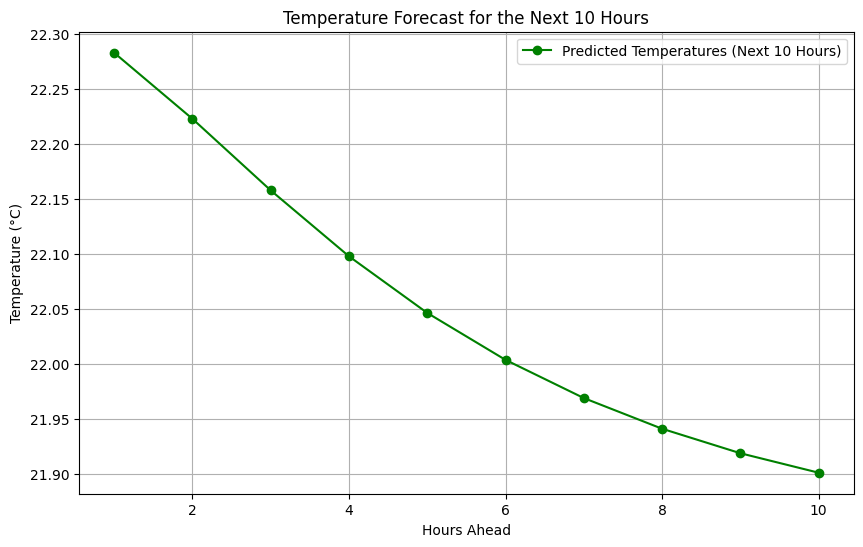

In [105]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), future_forecast1, label='Predicted Temperatures (Next 10 Hours)', color='green', marker='o')
plt.title('Temperature Forecast for the Next 10 Hours')
plt.xlabel('Hours Ahead')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Thessaloniki

### exogenous predictions with ARIMA

In [106]:
# Training ARIMA models for each exogenous variable and predict future values (next 10 hours)
predicted_exogenous2 = pd.DataFrame()

In [107]:
for var in exogenous_vars:
    # Fit an ARIMA model for the current exogenous variable
    model_exog = pm.auto_arima(train_data[var], seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

    # Forecast the next 10 hours for the current exogenous variable
    forecast_exog = model_exog.predict(n_periods=10)

    # Store the forecasted exogenous variable
    predicted_exogenous2[var] = forecast_exog

### Forecasting

In [108]:
# Now that we have forecasted exogenous variables, we can use them in ARIMAX to predict the temperature
# Perform grid search with auto_arima for the temperature model, including forecasted exogenous variables
model_arimax2 = pm.auto_arima(
    y=train_target,             # Training target (temperature)
    X=train_exogenous,          # Exogenous variables (other weather data)
    start_p=1,                  # Starting values for p (AR term)
    start_q=1,                  # Starting values for q (MA term)
    max_p=5,                    # Maximum value for p (AR term)
    max_q=5,                    # Maximum value for q (MA term)
    seasonal=False,             # No seasonality in this case
    d=None,                     # Let the model determine differencing (d)
    trace=True,                 # Print the search progress
    error_action='ignore',      # Ignore errors
    suppress_warnings=True,     # Suppress warnings
    stepwise=True               # Use stepwise grid search
)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=64.232, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.498, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=71.346, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=76.856, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=70.386, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=66.999, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=70.032, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=65.424, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=66.607, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.258, Time=0.42 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.099 seconds


In [109]:
# Summarize the ARIMAX model
print(model_arimax2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -23.116
Date:                Sat, 21 Sep 2024   AIC                             64.232
Time:                        04:17:53   BIC                             73.633
Sample:                    09-20-2024   HQIC                            66.272
                         - 09-20-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Temp (°C)          1.3268      0.897      1.479      0.139      -0.431       3.085
Min Temp (°C)          0.7948      1.001      0.794      0.427      -1.166       2.756
Precipitation (mm)  

In [110]:
# Predict the temperature for the next 10 hours using the forecasted exogenous variables
n_periods = 10  # Number of hours to predict
future_forecast2 = model_arimax2.predict(n_periods=n_periods, X=predicted_exogenous2)

In [111]:
# Print the forecasted temperatures
print("\nPredicted Temperatures for the next 10 hours:", future_forecast2)


Predicted Temperatures for the next 10 hours: 2024-09-20 21:00:00+00:00    22.283090
2024-09-20 22:00:00+00:00    22.223011
2024-09-20 23:00:00+00:00    22.157939
2024-09-21 00:00:00+00:00    22.097991
2024-09-21 01:00:00+00:00    22.046486
2024-09-21 02:00:00+00:00    22.003785
2024-09-21 03:00:00+00:00    21.969073
2024-09-21 04:00:00+00:00    21.941174
2024-09-21 05:00:00+00:00    21.918902
2024-09-21 06:00:00+00:00    21.901193
Freq: H, dtype: float64


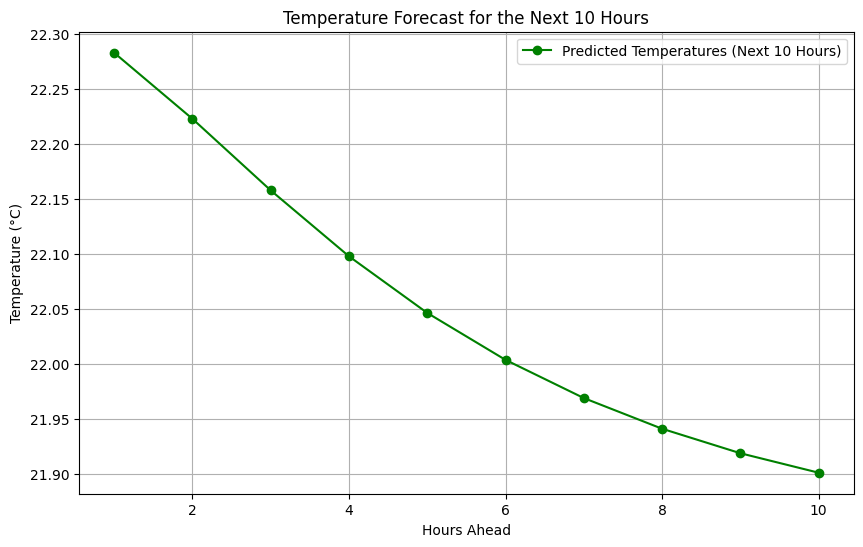

In [112]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), future_forecast2, label='Predicted Temperatures (Next 10 Hours)', color='green', marker='o')
plt.title('Temperature Forecast for the Next 10 Hours')
plt.xlabel('Hours Ahead')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Patras

### exogenous predictions with ARIMA

In [113]:
# Training ARIMA models for each exogenous variable and predict future values (next 10 hours)
predicted_exogenous3 = pd.DataFrame()

In [114]:
for var in exogenous_vars:
    # Fit an ARIMA model for the current exogenous variable
    model_exog = pm.auto_arima(train_data[var], seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

    # Forecast the next 10 hours for the current exogenous variable
    forecast_exog = model_exog.predict(n_periods=10)

    # Store the forecasted exogenous variable
    predicted_exogenous3[var] = forecast_exog

### Forecasting

In [115]:
# Now that we have forecasted exogenous variables, we can use them in ARIMAX to predict the temperature
# Perform grid search with auto_arima for the temperature model, including forecasted exogenous variables
model_arimax3 = pm.auto_arima(
    y=train_target,             # Training target (temperature)
    X=train_exogenous,          # Exogenous variables (other weather data)
    start_p=1,                  # Starting values for p (AR term)
    start_q=1,                  # Starting values for q (MA term)
    max_p=5,                    # Maximum value for p (AR term)
    max_q=5,                    # Maximum value for q (MA term)
    seasonal=False,             # No seasonality in this case
    d=None,                     # Let the model determine differencing (d)
    trace=True,                 # Print the search progress
    error_action='ignore',      # Ignore errors
    suppress_warnings=True,     # Suppress warnings
    stepwise=True               # Use stepwise grid search
)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=64.232, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.498, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=71.346, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=76.856, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=70.386, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=66.999, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=70.032, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=65.424, Time=0.40 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=66.607, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.258, Time=0.32 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.095 seconds


In [116]:
# Summarize the ARIMAX model
print(model_arimax3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -23.116
Date:                Sat, 21 Sep 2024   AIC                             64.232
Time:                        04:18:06   BIC                             73.633
Sample:                    09-20-2024   HQIC                            66.272
                         - 09-20-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Max Temp (°C)          1.3268      0.897      1.479      0.139      -0.431       3.085
Min Temp (°C)          0.7948      1.001      0.794      0.427      -1.166       2.756
Precipitation (mm)  

In [117]:
# Predict the temperature for the next 10 hours using the forecasted exogenous variables
n_periods = 10  # Number of hours to predict
future_forecast3 = model_arimax3.predict(n_periods=n_periods, X=predicted_exogenous3)

In [118]:
# Print the forecasted temperatures
print("\nPredicted Temperatures for the next 10 hours:", future_forecast3)


Predicted Temperatures for the next 10 hours: 2024-09-20 21:00:00+00:00    22.283090
2024-09-20 22:00:00+00:00    22.223011
2024-09-20 23:00:00+00:00    22.157939
2024-09-21 00:00:00+00:00    22.097991
2024-09-21 01:00:00+00:00    22.046486
2024-09-21 02:00:00+00:00    22.003785
2024-09-21 03:00:00+00:00    21.969073
2024-09-21 04:00:00+00:00    21.941174
2024-09-21 05:00:00+00:00    21.918902
2024-09-21 06:00:00+00:00    21.901193
Freq: H, dtype: float64


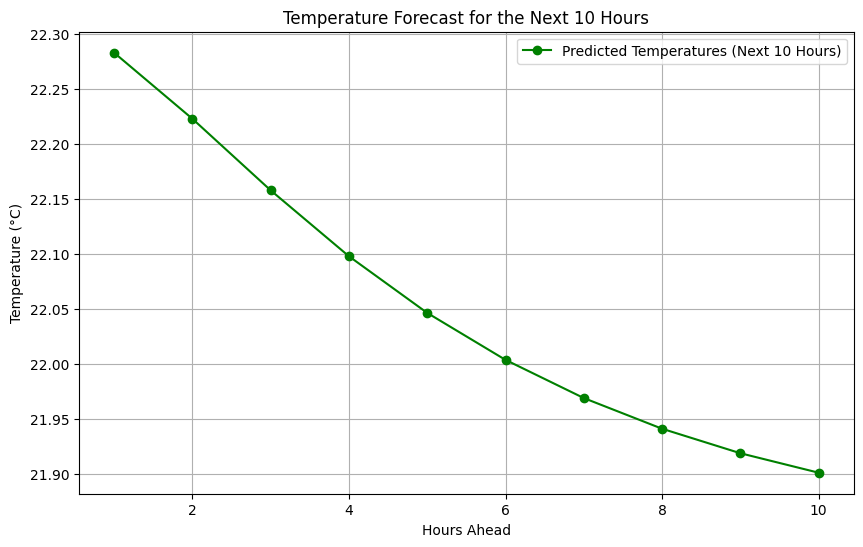

In [119]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), future_forecast3, label='Predicted Temperatures (Next 10 Hours)', color='green', marker='o')
plt.title('Temperature Forecast for the Next 10 Hours')
plt.xlabel('Hours Ahead')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Database

## The results

Athens

In [120]:
print(predicted_exogenous1)

                           Max Temp (°C)  Min Temp (°C)  Precipitation (mm)  \
2024-09-20 21:00:00+00:00           24.8      17.099972                 0.0   
2024-09-20 22:00:00+00:00           24.8      17.099972                 0.0   
2024-09-20 23:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 00:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 01:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 02:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 03:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 04:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 05:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 06:00:00+00:00           24.8      17.099972                 0.0   

                           Wind Direction (°)  Wind Gusts (m/s)  \
2024-09-20 21:00:00+00:00          163.652381               3.4

In [121]:
print(future_forecast1)

2024-09-20 21:00:00+00:00    22.283090
2024-09-20 22:00:00+00:00    22.223011
2024-09-20 23:00:00+00:00    22.157939
2024-09-21 00:00:00+00:00    22.097991
2024-09-21 01:00:00+00:00    22.046486
2024-09-21 02:00:00+00:00    22.003785
2024-09-21 03:00:00+00:00    21.969073
2024-09-21 04:00:00+00:00    21.941174
2024-09-21 05:00:00+00:00    21.918902
2024-09-21 06:00:00+00:00    21.901193
Freq: H, dtype: float64


Thessaloniki

In [122]:
print(predicted_exogenous2)

                           Max Temp (°C)  Min Temp (°C)  Precipitation (mm)  \
2024-09-20 21:00:00+00:00           24.8      17.099972                 0.0   
2024-09-20 22:00:00+00:00           24.8      17.099972                 0.0   
2024-09-20 23:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 00:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 01:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 02:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 03:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 04:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 05:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 06:00:00+00:00           24.8      17.099972                 0.0   

                           Wind Direction (°)  Wind Gusts (m/s)  \
2024-09-20 21:00:00+00:00          163.652381               3.4

In [123]:
print(future_forecast2)

2024-09-20 21:00:00+00:00    22.283090
2024-09-20 22:00:00+00:00    22.223011
2024-09-20 23:00:00+00:00    22.157939
2024-09-21 00:00:00+00:00    22.097991
2024-09-21 01:00:00+00:00    22.046486
2024-09-21 02:00:00+00:00    22.003785
2024-09-21 03:00:00+00:00    21.969073
2024-09-21 04:00:00+00:00    21.941174
2024-09-21 05:00:00+00:00    21.918902
2024-09-21 06:00:00+00:00    21.901193
Freq: H, dtype: float64


Patras

In [124]:
print(predicted_exogenous3)

                           Max Temp (°C)  Min Temp (°C)  Precipitation (mm)  \
2024-09-20 21:00:00+00:00           24.8      17.099972                 0.0   
2024-09-20 22:00:00+00:00           24.8      17.099972                 0.0   
2024-09-20 23:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 00:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 01:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 02:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 03:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 04:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 05:00:00+00:00           24.8      17.099972                 0.0   
2024-09-21 06:00:00+00:00           24.8      17.099972                 0.0   

                           Wind Direction (°)  Wind Gusts (m/s)  \
2024-09-20 21:00:00+00:00          163.652381               3.4

In [125]:
print(future_forecast3)

2024-09-20 21:00:00+00:00    22.283090
2024-09-20 22:00:00+00:00    22.223011
2024-09-20 23:00:00+00:00    22.157939
2024-09-21 00:00:00+00:00    22.097991
2024-09-21 01:00:00+00:00    22.046486
2024-09-21 02:00:00+00:00    22.003785
2024-09-21 03:00:00+00:00    21.969073
2024-09-21 04:00:00+00:00    21.941174
2024-09-21 05:00:00+00:00    21.918902
2024-09-21 06:00:00+00:00    21.901193
Freq: H, dtype: float64


## Dataframe of the results

### Athens

In [128]:
df_Athens = pd.DataFrame(predicted_exogenous1)
df_Athens.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s)
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555


In [129]:
df_Athens2 = pd.DataFrame(future_forecast1)
df_Athens2.head()

,0
2024-09-20 21:00:00+00:00,22.283090
2024-09-20 22:00:00+00:00,22.223011
2024-09-20 23:00:00+00:00,22.157939
2024-09-21 00:00:00+00:00,22.097991
2024-09-21 01:00:00+00:00,22.046486


In [131]:
df_Athens_combined = pd.concat([df_Athens, df_Athens2], axis=1)
df_Athens_combined = df_Athens_combined.rename(columns={0: "Temperature"})
df_Athens_combined.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s),Temperature
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536,22.283090
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288,22.223011
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626,22.157939
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761,22.097991
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555,22.046486


### Thessaloniki

In [132]:
df_Thess = pd.DataFrame(predicted_exogenous2)
df_Thess.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s)
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555


In [133]:
df_Thess2 = pd.DataFrame(future_forecast2)
df_Thess2.head()

,0
2024-09-20 21:00:00+00:00,22.283090
2024-09-20 22:00:00+00:00,22.223011
2024-09-20 23:00:00+00:00,22.157939
2024-09-21 00:00:00+00:00,22.097991
2024-09-21 01:00:00+00:00,22.046486


In [134]:
df_Thess_combined = pd.concat([df_Thess, df_Thess2], axis=1)
df_Thess_combined = df_Thess_combined.rename(columns={0: "Temperature"})
df_Thess_combined.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s),Temperature
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536,22.283090
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288,22.223011
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626,22.157939
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761,22.097991
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555,22.046486


### Patras

In [135]:
df_Patras = pd.DataFrame(predicted_exogenous3)
df_Patras.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s)
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555


In [136]:
df_Patras2 = pd.DataFrame(future_forecast3)
df_Patras2.head()

,0
2024-09-20 21:00:00+00:00,22.283090
2024-09-20 22:00:00+00:00,22.223011
2024-09-20 23:00:00+00:00,22.157939
2024-09-21 00:00:00+00:00,22.097991
2024-09-21 01:00:00+00:00,22.046486


In [137]:
df_Patras_combined = pd.concat([df_Patras, df_Patras2], axis=1)
df_Patras_combined = df_Patras_combined.rename(columns={0: "Temperature"})
df_Patras_combined.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s),Temperature
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536,22.283090
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288,22.223011
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626,22.157939
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761,22.097991
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555,22.046486


## My SQL

In [143]:
patras = df_Patras_combined
patras.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s),Temperature
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536,22.283090
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288,22.223011
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626,22.157939
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761,22.097991
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555,22.046486


In [144]:
thess = df_Thess_combined
thess.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s),Temperature
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536,22.283090
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288,22.223011
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626,22.157939
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761,22.097991
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555,22.046486


In [140]:
athens = df_Athens_combined
athens.head()

,Max Temp (°C),Min Temp (°C),Precipitation (mm),Wind Direction (°),Wind Gusts (m/s),Wind Speed (m/s),Temperature
2024-09-20 21:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.369536,22.283090
2024-09-20 22:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.306288,22.223011
2024-09-20 23:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.275626,22.157939
2024-09-21 00:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.260761,22.097991
2024-09-21 01:00:00+00:00,24.8,17.099972,0.0,163.652381,3.4,1.253555,22.046486


In [142]:
# Create SQL file
with open('athens_db.sql', 'w') as f:

    # Step 1: Write the CREATE TABLE statement
    f.write('CREATE DATABASE IF NOT EXISTS athens_db;\n')
    f.write('USE athens_db;\n')
    f.write('DROP TABLE IF EXISTS athens_table;\n')

    # Define the CREATE TABLE statement based on DataFrame columns
    create_table = '''CREATE TABLE athens_table (
        id INT AUTO_INCREMENT PRIMARY KEY,\n'''

    for column in athens.columns:
        if athens[column].dtype == 'int64':
            create_table += f'    `{column}` INT,\n'
        elif athens[column].dtype == 'float64':
            create_table += f'    `{column}` FLOAT,\n'
        else:
            create_table += f'    `{column}` VARCHAR(255),\n'

    create_table = create_table.rstrip(",\n") + '\n);\n'

    # Write the CREATE TABLE command
    f.write(create_table)

    # Step 2: Write the INSERT INTO statements
    for index, row in athens.iterrows():
        insert_statement = f"INSERT INTO athens_table ("
        insert_statement += ", ".join([f"`{col}`" for col in athens.columns]) + ") VALUES ("
        insert_statement += ", ".join([f"'{str(val)}'" if isinstance(val, str) else str(val) for val in row.values]) + ");\n"

        # Write each insert statement
        f.write(insert_statement)

print("SQL file 'athens_db.sql' created successfully.")

SQL file 'athens_db.sql' created successfully.


In [145]:
# Example: Save these DataFrames to an SQL file
with open('weather_db.sql', 'w') as f:

    # Step 1: Create the DATABASE
    f.write('CREATE DATABASE IF NOT EXISTS weather_db;\n')
    f.write('USE weather_db;\n')

    # Function to write CREATE TABLE and INSERT INTO statements for a DataFrame
    def write_table_to_sql(df, table_name):
        # Write the DROP TABLE statement
        f.write(f'DROP TABLE IF EXISTS {table_name};\n')

        # Create table statement based on the DataFrame's columns and data types
        create_table = f'CREATE TABLE {table_name} (\n'
        create_table += '    id INT AUTO_INCREMENT PRIMARY KEY,\n'

        for column in df.columns:
            if df[column].dtype == 'int64':
                create_table += f'    `{column}` INT,\n'
            elif df[column].dtype == 'float64':
                create_table += f'    `{column}` FLOAT,\n'
            else:
                create_table += f'    `{column}` VARCHAR(255),\n'

        create_table = create_table.rstrip(",\n") + '\n);\n'
        f.write(create_table)

        # Write INSERT INTO statements for each row of the DataFrame
        for index, row in df.iterrows():
            insert_statement = f"INSERT INTO {table_name} ("
            insert_statement += ", ".join([f"`{col}`" for col in df.columns]) + ") VALUES ("
            insert_statement += ", ".join([f"'{str(val)}'" if isinstance(val, str) else str(val) for val in row.values]) + ");\n"
            f.write(insert_statement)

    # Write tables for Athens, Thessaloniki, and Patras
    write_table_to_sql(athens, 'athens_table')
    write_table_to_sql(thess, 'thessaloniki_table')
    write_table_to_sql(patras, 'patras_table')

print("SQL file 'weather_db.sql' created successfully.")

SQL file 'weather_db.sql' created successfully.


# Extra code

In [27]:
 # Loop through the timestamps and display the data for each hour
for i in range(len(data1['data'][0]['coordinates'][0]['dates'])):
    timestamp = data1['data'][0]['coordinates'][0]['dates'][i]['date']
    temperature = data1['data'][0]['coordinates'][0]['dates'][i]['value']
    precipitation = data1['data'][1]['coordinates'][0]['dates'][i]['value']
    wind_speed = data1['data'][2]['coordinates'][0]['dates'][i]['value']

    print(f"Timestamp: {timestamp}")
    print(f"Temperature: {temperature}°C")
    print(f"Precipitation: {precipitation} mm")
    print(f"Wind Speed: {wind_speed} m/s")
    print("-" * 40)

Timestamp: 2024-09-18T22:00:00Z
Temperature: 2.1°C
Precipitation: 353.1 mm
Wind Speed: 4.6 m/s
----------------------------------------
Timestamp: 2024-09-18T23:00:00Z
Temperature: 2.4°C
Precipitation: 356.5 mm
Wind Speed: 4.6 m/s
----------------------------------------
Timestamp: 2024-09-19T00:00:00Z
Temperature: 2.5°C
Precipitation: 359.9 mm
Wind Speed: 4.6 m/s
----------------------------------------


In [ ]:
# download the training data not to run queries all the time
#weather_df.to_csv('athens_weather_data.csv')

In [32]:
# Remove the last 6 characters from the Timestamp (i.e., 'Z' and time separator)
#df['Timestamp'] = df['Timestamp'].astype(str).str[:-6]